In [3]:
import praw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os

client_id = os.environ.get('REDDIT_PERSONAL_USE_SCRIPT')
client_secret = os.environ.get('REDDIT_SECRET')
user_agent = os.environ.get('REDDIT_USER_AGENT')

reddit = praw.Reddit(client_id=client_id, client_secret=client_secret, user_agent=user_agent)

print(client_id, client_secret, user_agent)

def get_posts(sub_name, n):
    subreddit = reddit.subreddit(sub_name)
    posts_list = []

    for submission in subreddit.top(limit=n):
        info_list = []
        info_list.append(submission.id)   # Output: the submission's title
        info_list.append(submission.score)  # Output: the submission's score
        info_list.append(str(submission.author))
        info_list.append(submission.num_comments)
        info_list.append(submission.subreddit)
        posts_list.append(info_list)

    a = sorted(posts_list, key=lambda x: x[1], reverse = True)
    posts_df = pd.DataFrame(a, columns = ['id', 'score', 'author', 'num_comments', 'subreddit'])
    return posts_df

def get_comments(subm_id, n):

    com_list = []
    submission = reddit.submission(id = subm_id)
    i = 0
    for comment in submission.comments:
        info_list = []
            # Top 3 comments for each submission
        if i <= n:
            info_list.append(comment.id)
            info_list.append(comment.score)
            info_list.append(comment.author)
            info_list.append(submission.subreddit)
            #info_list.append(submission.comments.list()[i].body)
            i += 1
            com_list.append(info_list)
        else:
            break

    a = sorted(com_list, key=lambda x: x[1], reverse = True)
    com_df = pd.DataFrame(a)
    return com_df

def get_user_posts(author, n):

    redditor = reddit.redditor(author)
    user_posts_list = []

    for submission in redditor.submissions.top(limit = n):
        info_list = []
        info_list.append(submission.id)
        info_list.append(submission.score)
        info_list.append(str(submission.author))
        info_list.append(submission.num_comments)
        info_list.append(str(submission.subreddit))
        user_posts_list.append(info_list)

    a = sorted(user_posts_list, key=lambda x: x[1], reverse = True)
    user_posts_df = pd.DataFrame(a)
    return user_posts_df

df= get_posts('all', 1000)
df.to_csv('reddit_posts.csv', index=False)


lFsBg6FAWdG60tipNvtbzA T41E8ddP5W3-oWz3p3ME4DR1mXEB9g MyScraper 1.0 by u/Fabulous-Muscle889


In [4]:
df.shape

(1000, 5)

In [5]:
df.head(10)

,id,score,author,num_comments,subreddit
0,l8rf4k,484763,SomeGuyInDeutschland,13964,wallstreetbets
1,haucpf,438825,ReallyRickAstley,18966,pics
2,62sjuh,436553,serventofgaben,5121,movies
3,gyfedz,406976,rextraneous,4285,memes
4,jptqj9,365121,throwawaynumber53,28362,news
5,ig9u4z,340900,BlackAdder7,3312,memes
6,l6wu59,337266,vrweensy,12874,wallstreetbets
7,90bu6w,333708,FootLoosePickleJuice,4365,aww
8,7mjw12,308589,the_Diva,2452,funny
9,fj45ih,299251,theonlymexicanman,1985,memes


In [6]:
most_common_subreddit = df['subreddit'].value_counts().idxmax()
print("The subreddit that appears most frequently in the data is:", most_common_subreddit)

The subreddit that appears most frequently in the data is: memes


<Axes: xlabel='score', ylabel='num_comments'>

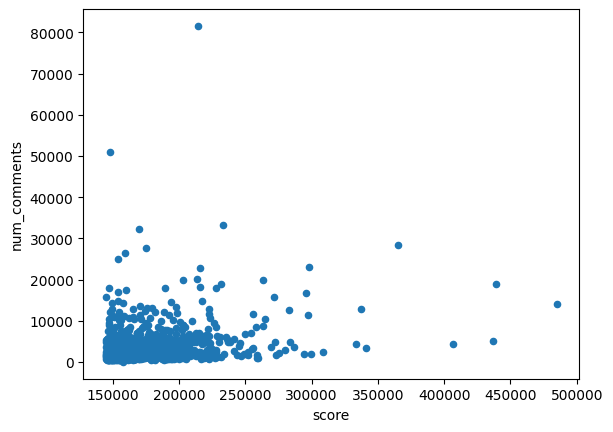

In [7]:
df.plot('score', 'num_comments', kind = 'scatter' )

In [8]:
mumbai_df = get_posts('mumbai', 500)

In [9]:
mumbai_df.author.nunique()

390

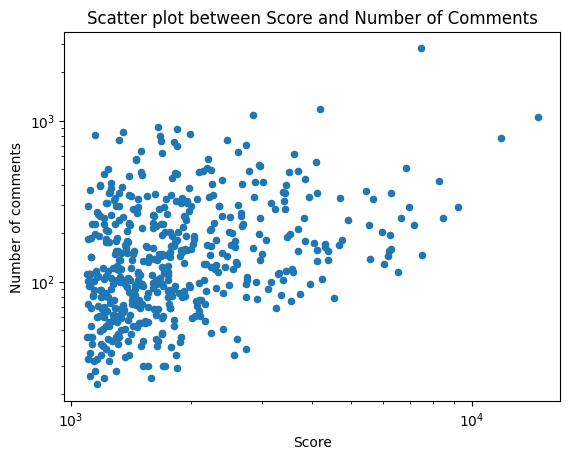

In [10]:
# See the relationship between comments and upvotes
ax = mumbai_df.plot('score', 'num_comments', kind = 'scatter',logx=True, logy=True, title='Scatter plot between Score and Number of Comments')
ax.set(xlabel="Score", ylabel="Number of comments")
plt.savefig("ScatterPlot",dpi=150, bbox_inches='tight',pad_inches=0.5)

In [11]:
repeating = mumbai_df[mumbai_df.duplicated(['author'], keep = False)] # Only take users who posted more than once
repeating = repeating[repeating.author != 'None'] # Get rid of deleted users
repeating.author.nunique() # Out of 500 posts, this is the amount of people who posted more than once

48

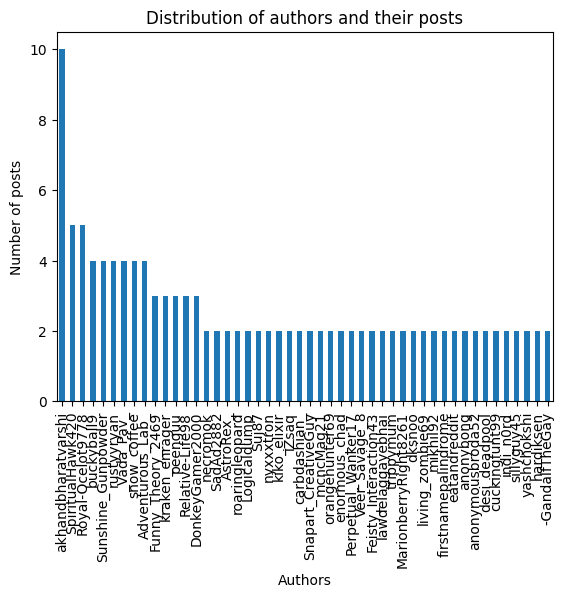

In [12]:
# See the distrubution of authors and their posts
ax = repeating.author.value_counts().plot(kind='bar',title='Distribution of authors and their posts')
ax.set(xlabel="Authors", ylabel="Number of posts")
plt.savefig("Bargraph",dpi=150, bbox_inches='tight',pad_inches=0.5)

In [13]:
u_authors = list(repeating.author.unique())
print(u_authors)

['Suj87', 'indi_n0rd', 'Adventurous_Lab_', 'snow_coffee', 'kraken_enrager', 'akhandbharatvarshi', 'MarionberryRight8261', 'Funny_Theory_2469', 'dksnoo', 'living_zombie69', 'mikhil92', 'firstnamepalindrome', 'eatandreddit', 'buckyball9', 'trippymum', 'SpiritualHawk420', 'anonybong', 'DonkeyGamer2000', '_Vada_Pav_', 'rustyyryan', 'Relative-Life98', 'desi_deadpool', 'cuckingfunt99', 'Sunshine_Gunpowder', 'Feisty_Interaction43', 'sillyguy45', 'yashchokshi', 'hardiksen', 'anonymousbroda52', 'lawdelaggayebhai', 'kiko_elixir', 'Veer_Savage_8', 'necromok', 'Royal-Ocelot9778', 'Logicaldump', 'peenguu', 'SadAd2882', 'AstroRex_', 'roaringleopard', 'nyxxxtron', 'iZsaq', 'carbdashian_', 'Snapart_CreativeGuy', 'mcncMag21', 'orangehunter69', 'enormous_chad', 'Perpetual_Wanker17', '-GandalfTheGay']


In [14]:
# Split the list into smaller lists of size three
u_authors_1 = u_authors[:3]
u_authors_2 = u_authors[3:6]
u_authors_3 = u_authors[6:9]
u_authors_4 = u_authors[9:12]
u_authors_5 = u_authors[12:15]
u_authors_6 = u_authors[15:18]
u_authors_7 = u_authors[18:21]
u_authors_8 = u_authors[21:24]
u_authors_9 = u_authors[24:27]
u_authors_10 = u_authors[27:30]
u_authors_11 = u_authors[30:33]
u_authors_12 = u_authors[33:36]
u_authors_13 = u_authors[36:39]
u_authors_14 = u_authors[39:42]
u_authors_15 = u_authors[42:45]
u_authors_16 = u_authors[45:48]
u_authors_17 = u_authors[48:]


def scrape_user_posts(username, limit):
    user_posts = []
    redditor = reddit.redditor(username)
    for submission in redditor.submissions.new(limit=limit):
        post_data = {
            'author':submission.author,
            'title': submission.title,
            'score': submission.score,
            'num_comments': submission.num_comments,
            'subreddit': submission.subreddit.display_name
        }
        user_posts.append(post_data)
    return user_posts


authors4_df = pd.DataFrame()

In [15]:
batch3_df = pd.DataFrame()
# Loop through every user in u_authors and get 10 top posts per user
for u in u_authors_14:
    user_posts = scrape_user_posts(u, limit=10)
    df = pd.DataFrame(user_posts)
    batch3_df = pd.concat([batch3_df, df])


authors4_df = pd.concat([authors4_df, batch3_df])

print(authors4_df.head())

      author                                              title  score  \
0  nyxxxtron      This is just sad. (Note - this is not satire)    168   
1  nyxxxtron  My dad bought 3 bitcoins back in the day. Sell...     66   
2  nyxxxtron  Regarding the post saying Sameer Rizvi is 24, ...    110   
3  nyxxxtron  Album ko "pop" bolke Voompla ne apni aukaat di...     44   
4  nyxxxtron  I am tired of the overworking collegue in my t...    865   

   num_comments            subreddit  
0            25            sadcringe  
1            17  cryptocurrencymemes  
2             9       CricketBuddies  
3            15             DHHMemes  
4           297      developersIndia  


In [16]:
authors4_df.to_csv('user1_posts.csv', index=False)
authors_df = authors4_df.rename(columns={0: "authot", 1: "title", 2: "score", 3: "num_comments", 4: "subreddit"})
authors_df.head(10) # Dataframe of other subreddits where authors posted

,author,title,score,num_comments,subreddit
0,nyxxxtron,This is just sad. (Note - this is not satire),168,25,sadcringe
1,nyxxxtron,My dad bought 3 bitcoins back in the day. Sell...,66,17,cryptocurrencymemes
2,nyxxxtron,"Regarding the post saying Sameer Rizvi is 24, ...",110,9,CricketBuddies
3,nyxxxtron,"Album ko ""pop"" bolke Voompla ne apni aukaat di...",44,15,DHHMemes
4,nyxxxtron,I am tired of the overworking collegue in my t...,865,297,developersIndia
5,nyxxxtron,Massive fire broke out today morning in Mira Road,804,49,mumbai
6,nyxxxtron,Men are simple creatures. Man see construction...,1486,95,mumbai
7,nyxxxtron,"Bulldozers used in Mira Road, Naya Nagar",1166,271,mumbai
8,nyxxxtron,Completed a 700 days streak today!,280,43,leetcode
9,nyxxxtron,Buying ON Protein Powder online: How does the ...,11,13,india


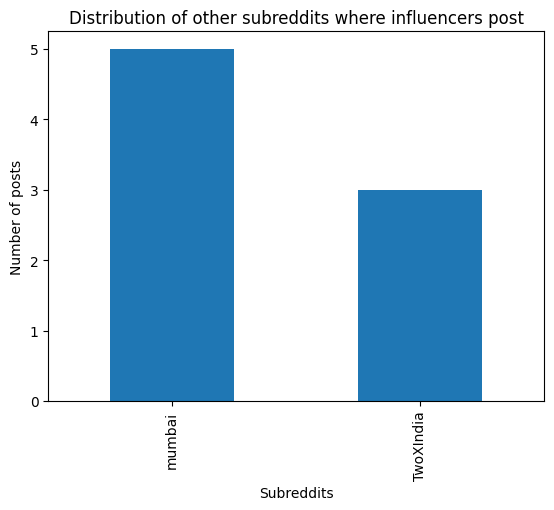

In [17]:
counts = authors_df['subreddit'].value_counts()
# Only plot the subreddits that appear more than twice
ax = authors_df[authors_df['subreddit'].isin(counts[counts > 2].index)].subreddit.value_counts().plot(kind='bar',title='Distribution of other subreddits where influencers post')
ax.set(xlabel="Subreddits", ylabel="Number of posts")
plt.savefig("BargraphSubreddits",dpi=150, bbox_inches='tight',pad_inches=0.5)

In [18]:
n_df = authors_df[['author', 'subreddit']] # Create a dataframe for network graph purposes
n_df.head()

,author,subreddit
0,nyxxxtron,sadcringe
1,nyxxxtron,cryptocurrencymemes
2,nyxxxtron,CricketBuddies
3,nyxxxtron,DHHMemes
4,nyxxxtron,developersIndia


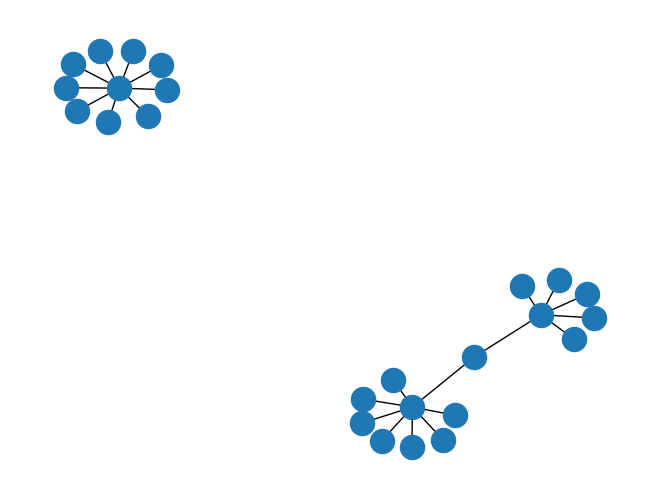

In [19]:
g = nx.from_pandas_edgelist(n_df, source='author', target='subreddit') # Initial ugly approach, decided to keep it
nx.draw(g)

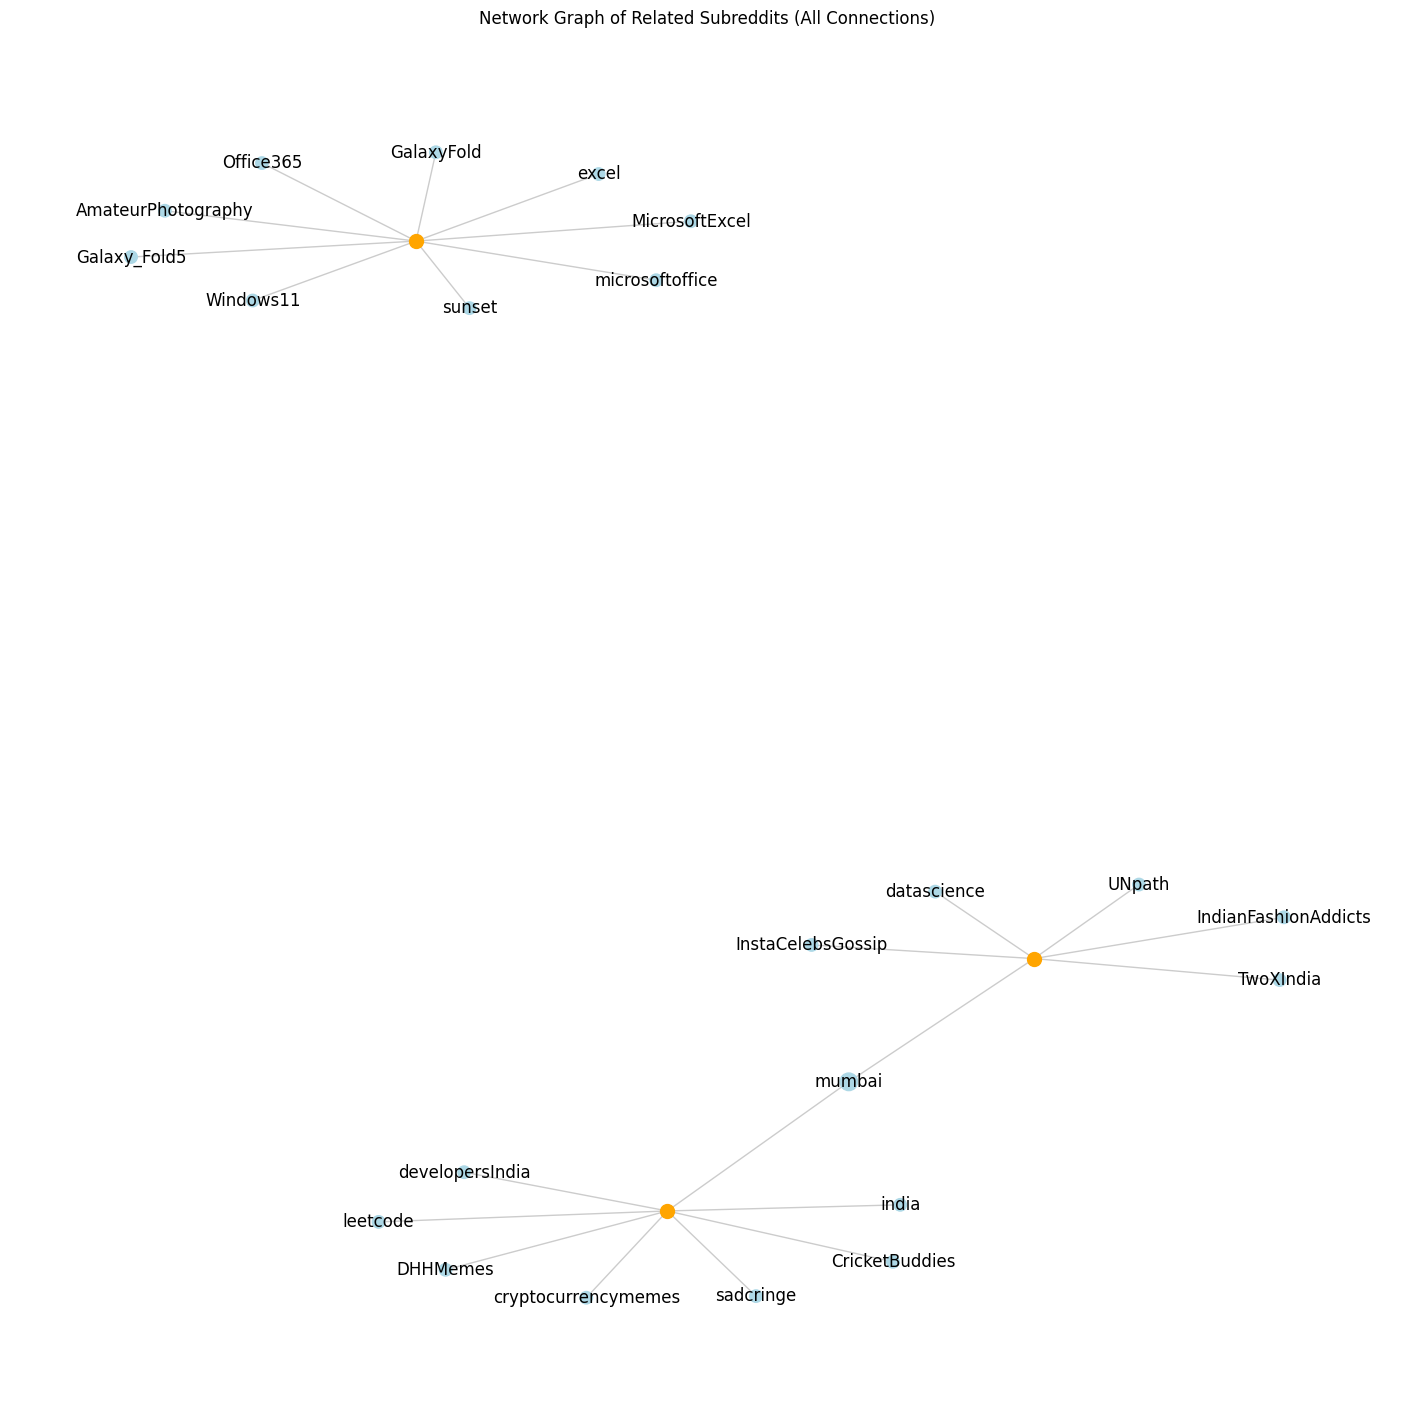

In [21]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Load your Mumbai Reddit data
mumbai_reddit_data = pd.read_csv('user1_posts.csv')
plt.figure(figsize=(18, 18))

# Create the graph from the dataframe
g = nx.from_pandas_edgelist(mumbai_reddit_data, source='author', target='subreddit')

# Create a layout for nodes
layout = nx.spring_layout(g, iterations=50, scale=2)

# Draw the parts of the graph
subs = list(set(mumbai_reddit_data['subreddit']))
u_authors = list(set(mumbai_reddit_data['author']))

sub_size = [g.degree(sub) * 80 for sub in subs]
nx.draw_networkx_nodes(g, layout, nodelist=subs, node_size=sub_size, node_color='lightblue')

popular_people = [person for person in u_authors if g.degree(person) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_people, node_color='orange', node_size=100)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(subs, subs))  # labels for subreddits
nx.draw_networkx_labels(g, layout, labels=node_labels)

# No axis needed
plt.axis('off')
plt.title("Network Graph of Related Subreddits (All Connections)")
plt.savefig("NetworkGraph", bbox_inches='tight',pad_inches=0.5)

plt.show()

In [28]:
import pandas as pd
import networkx as nx

# Load CSV data
reddit_data = pd.read_csv('user1_posts.csv')

# Construct a network where nodes are users and edges represent interactions (comments/posts)
G = nx.from_pandas_edgelist(reddit_data, source='author', target='subreddit')

# Compute centrality measures
degree_centralities = nx.degree_centrality(G)
betweenness_centralities = nx.betweenness_centrality(G)
closeness_centralities = nx.closeness_centrality(G)
eigenvector_centralities = nx.eigenvector_centrality(G, max_iter=1000)

# Find top nodes for each centrality measure
top_degree_nodes = sorted(degree_centralities, key=degree_centralities.get, reverse=True)[:4]
top_betweenness_nodes = sorted(betweenness_centralities, key=betweenness_centralities.get, reverse=True)[:4]
top_closeness_nodes = sorted(closeness_centralities, key=closeness_centralities.get, reverse=True)[:4]
top_eigenvector_nodes = sorted(eigenvector_centralities, key=eigenvector_centralities.get, reverse=True)[:4]

# Print top nodes for each centrality measure
print("Top Nodes by Degree Centrality:")
for node in top_degree_nodes:
    print(f"Node: {node}, Degree Centrality: {degree_centralities[node]}")
print("Degree centrality measures the number of connections (edges) a node has. Nodes with high degree centrality are popular users or subreddits, which are important for spreading information.")

print("\nTop Nodes by Betweenness Centrality:")
for node in top_betweenness_nodes:
    print(f"Node: {node}, Betweenness Centrality: {betweenness_centralities[node]}")
print("Betweenness centrality identifies nodes that act as bridges between different parts of the network. Nodes with high betweenness centrality control the flow of information between communities or groups.")

print("\nTop Nodes by Closeness Centrality:")
for node in top_closeness_nodes:
    print(f"Node: {node}, Closeness Centrality: {closeness_centralities[node]}")
print("Closeness centrality measures how quickly information can spread from a node to other nodes in the network. Nodes with high closeness centrality are influential in terms of information diffusion.")

print("\nTop Nodes by Eigenvector Centrality:")
for node in top_eigenvector_nodes:
    print(f"Node: {node}, Eigenvector Centrality: {eigenvector_centralities[node]}")
print("Eigenvector centrality measures the influence of a node in the network, taking into account the influence of its neighbors. Nodes with high eigenvector centrality are influential because they are connected to other influential nodes.")


Top Nodes by Degree Centrality:
Node: iZsaq, Degree Centrality: 0.375
Node: nyxxxtron, Degree Centrality: 0.3333333333333333
Node: carbdashian_, Degree Centrality: 0.25
Node: mumbai, Degree Centrality: 0.08333333333333333
Degree centrality measures the number of connections (edges) a node has. Nodes with high degree centrality are popular users or subreddits, which are important for spreading information.

Top Nodes by Betweenness Centrality:
Node: nyxxxtron, Betweenness Centrality: 0.2536231884057971
Node: carbdashian_, Betweenness Centrality: 0.19927536231884058
Node: mumbai, Betweenness Centrality: 0.17391304347826086
Node: iZsaq, Betweenness Centrality: 0.13043478260869565
Betweenness centrality identifies nodes that act as bridges between different parts of the network. Nodes with high betweenness centrality control the flow of information between communities or groups.

Top Nodes by Closeness Centrality:
Node: iZsaq, Closeness Centrality: 0.375
Node: nyxxxtron, Closeness Centrali

In [30]:
import pandas as pd
import networkx as nx

# Load CSV data
reddit_data = pd.read_csv('user1_posts.csv')

# Construct a network where nodes are users and edges represent interactions (comments/posts)
G = nx.from_pandas_edgelist(reddit_data, source='author', target='subreddit')

# Compute centrality measures
degree_centralities = nx.degree_centrality(G)
betweenness_centralities = nx.betweenness_centrality(G)
closeness_centralities = nx.closeness_centrality(G)
eigenvector_centralities = nx.eigenvector_centrality(G, max_iter=1000)

# Compute combined centrality score for each node
combined_centrality_scores = {}
for node in G.nodes():
    combined_centrality_scores[node] = degree_centralities[node] + betweenness_centralities[node] + closeness_centralities[node] + eigenvector_centralities[node]

# Find the top 5 influential nodes
top_influential_nodes = sorted(combined_centrality_scores, key=combined_centrality_scores.get, reverse=True)[:5]

# Print the top 5 influential nodes and their combined centrality scores
print("Top 5 Influential Nodes:")
for node in top_influential_nodes:
    print(f"Node: {node}, Combined Centrality Score: {combined_centrality_scores[node]}")


Top 5 Influential Nodes:
Node: iZsaq, Combined Centrality Score: 1.5875415324066129
Node: nyxxxtron, Combined Centrality Score: 0.9138178404734089
Node: carbdashian_, Combined Centrality Score: 0.7309651852474882
Node: mumbai, Combined Centrality Score: 0.5714438411416861
Node: GalaxyFold, Combined Centrality Score: 0.47589832836401175


In [31]:
g.degree('nyxxxtron')

8

/var/folders/9m/dgm6m1bx5gzbq2rlkh5mh35c0000gn/T/ipykernel_13896/858119949.py:20: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(adj_matrix, 'ward')


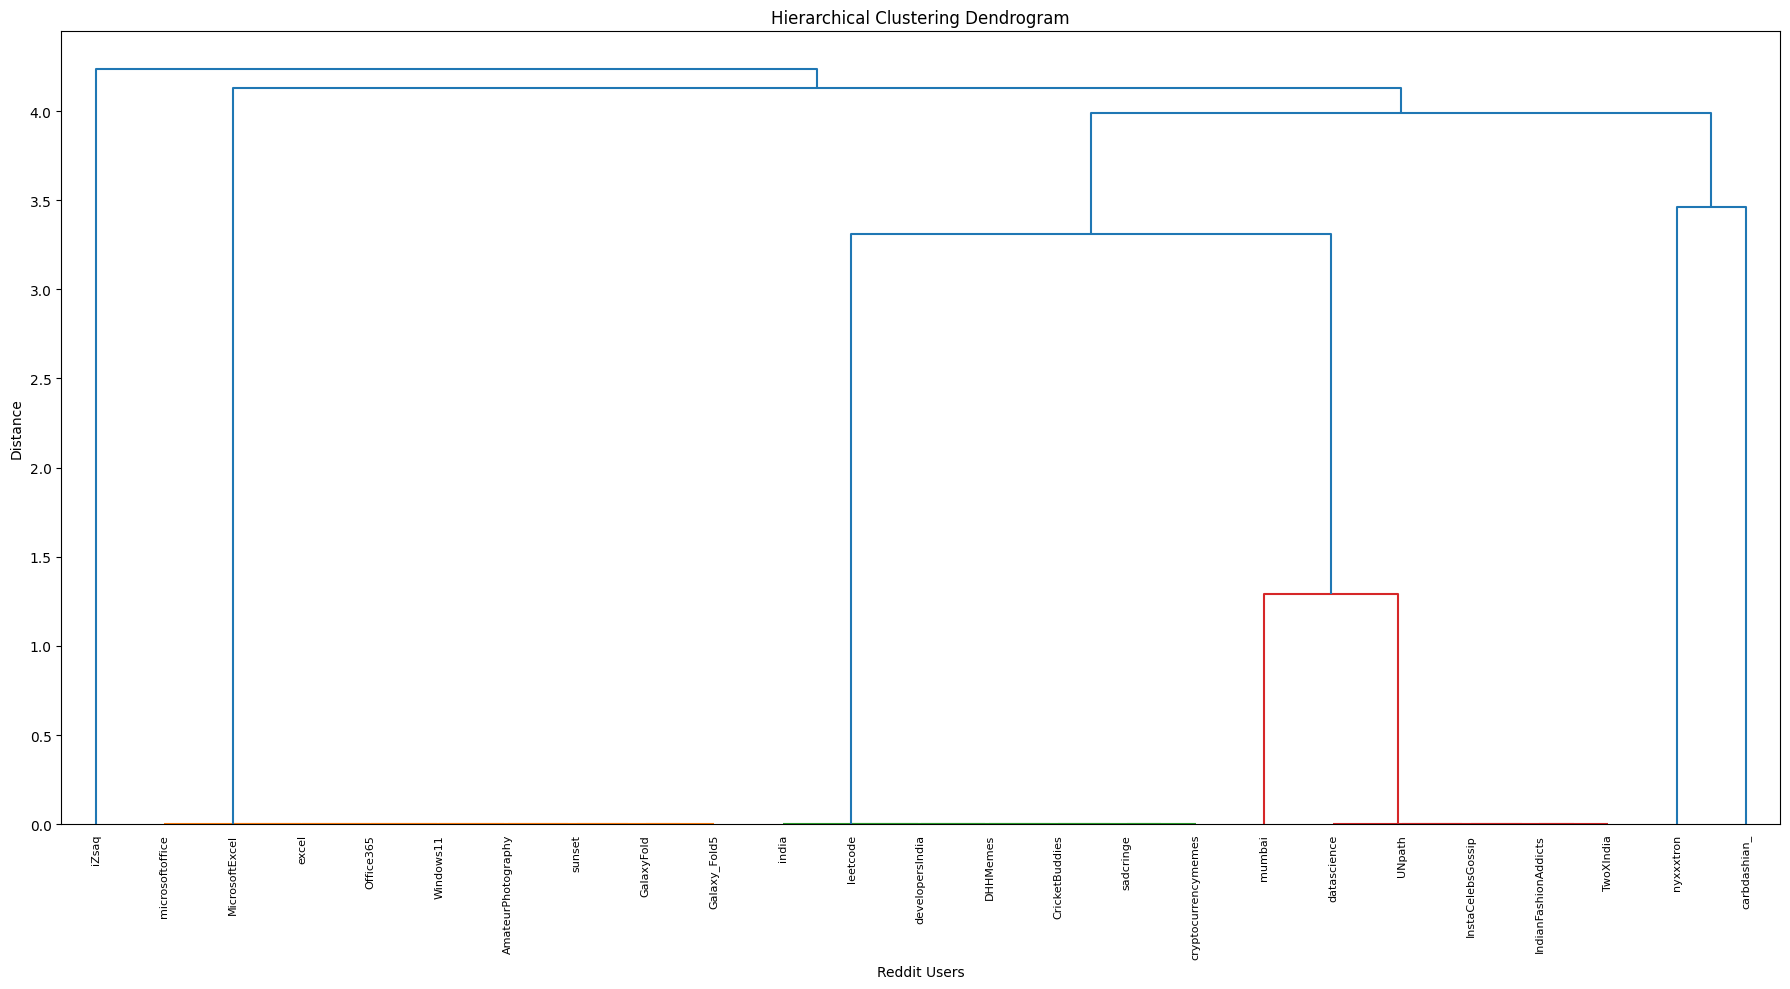

In [32]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

# Load CSV data
reddit_data = pd.read_csv('user1_posts.csv')

# Construct a network where nodes are users and edges represent interactions (comments/posts)
G = nx.from_pandas_edgelist(reddit_data, source='author', target='subreddit')

# Compute adjacency matrix
adj_matrix = nx.to_numpy_array(G)

# Get node labels (user names)
node_labels = {node: node for node in G.nodes()}

# Perform hierarchical clustering
Z = linkage(adj_matrix, 'ward')

# Plot dendrogram
plt.figure(figsize=(18, 10))  # Adjust the figure size
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, labels=[node_labels[node] for node in G.nodes()], leaf_rotation=90, leaf_font_size=8)
plt.xlabel('Reddit Users')
plt.ylabel('Distance')
plt.tight_layout()  # Ensure the plot fits nicely
plt.show()


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


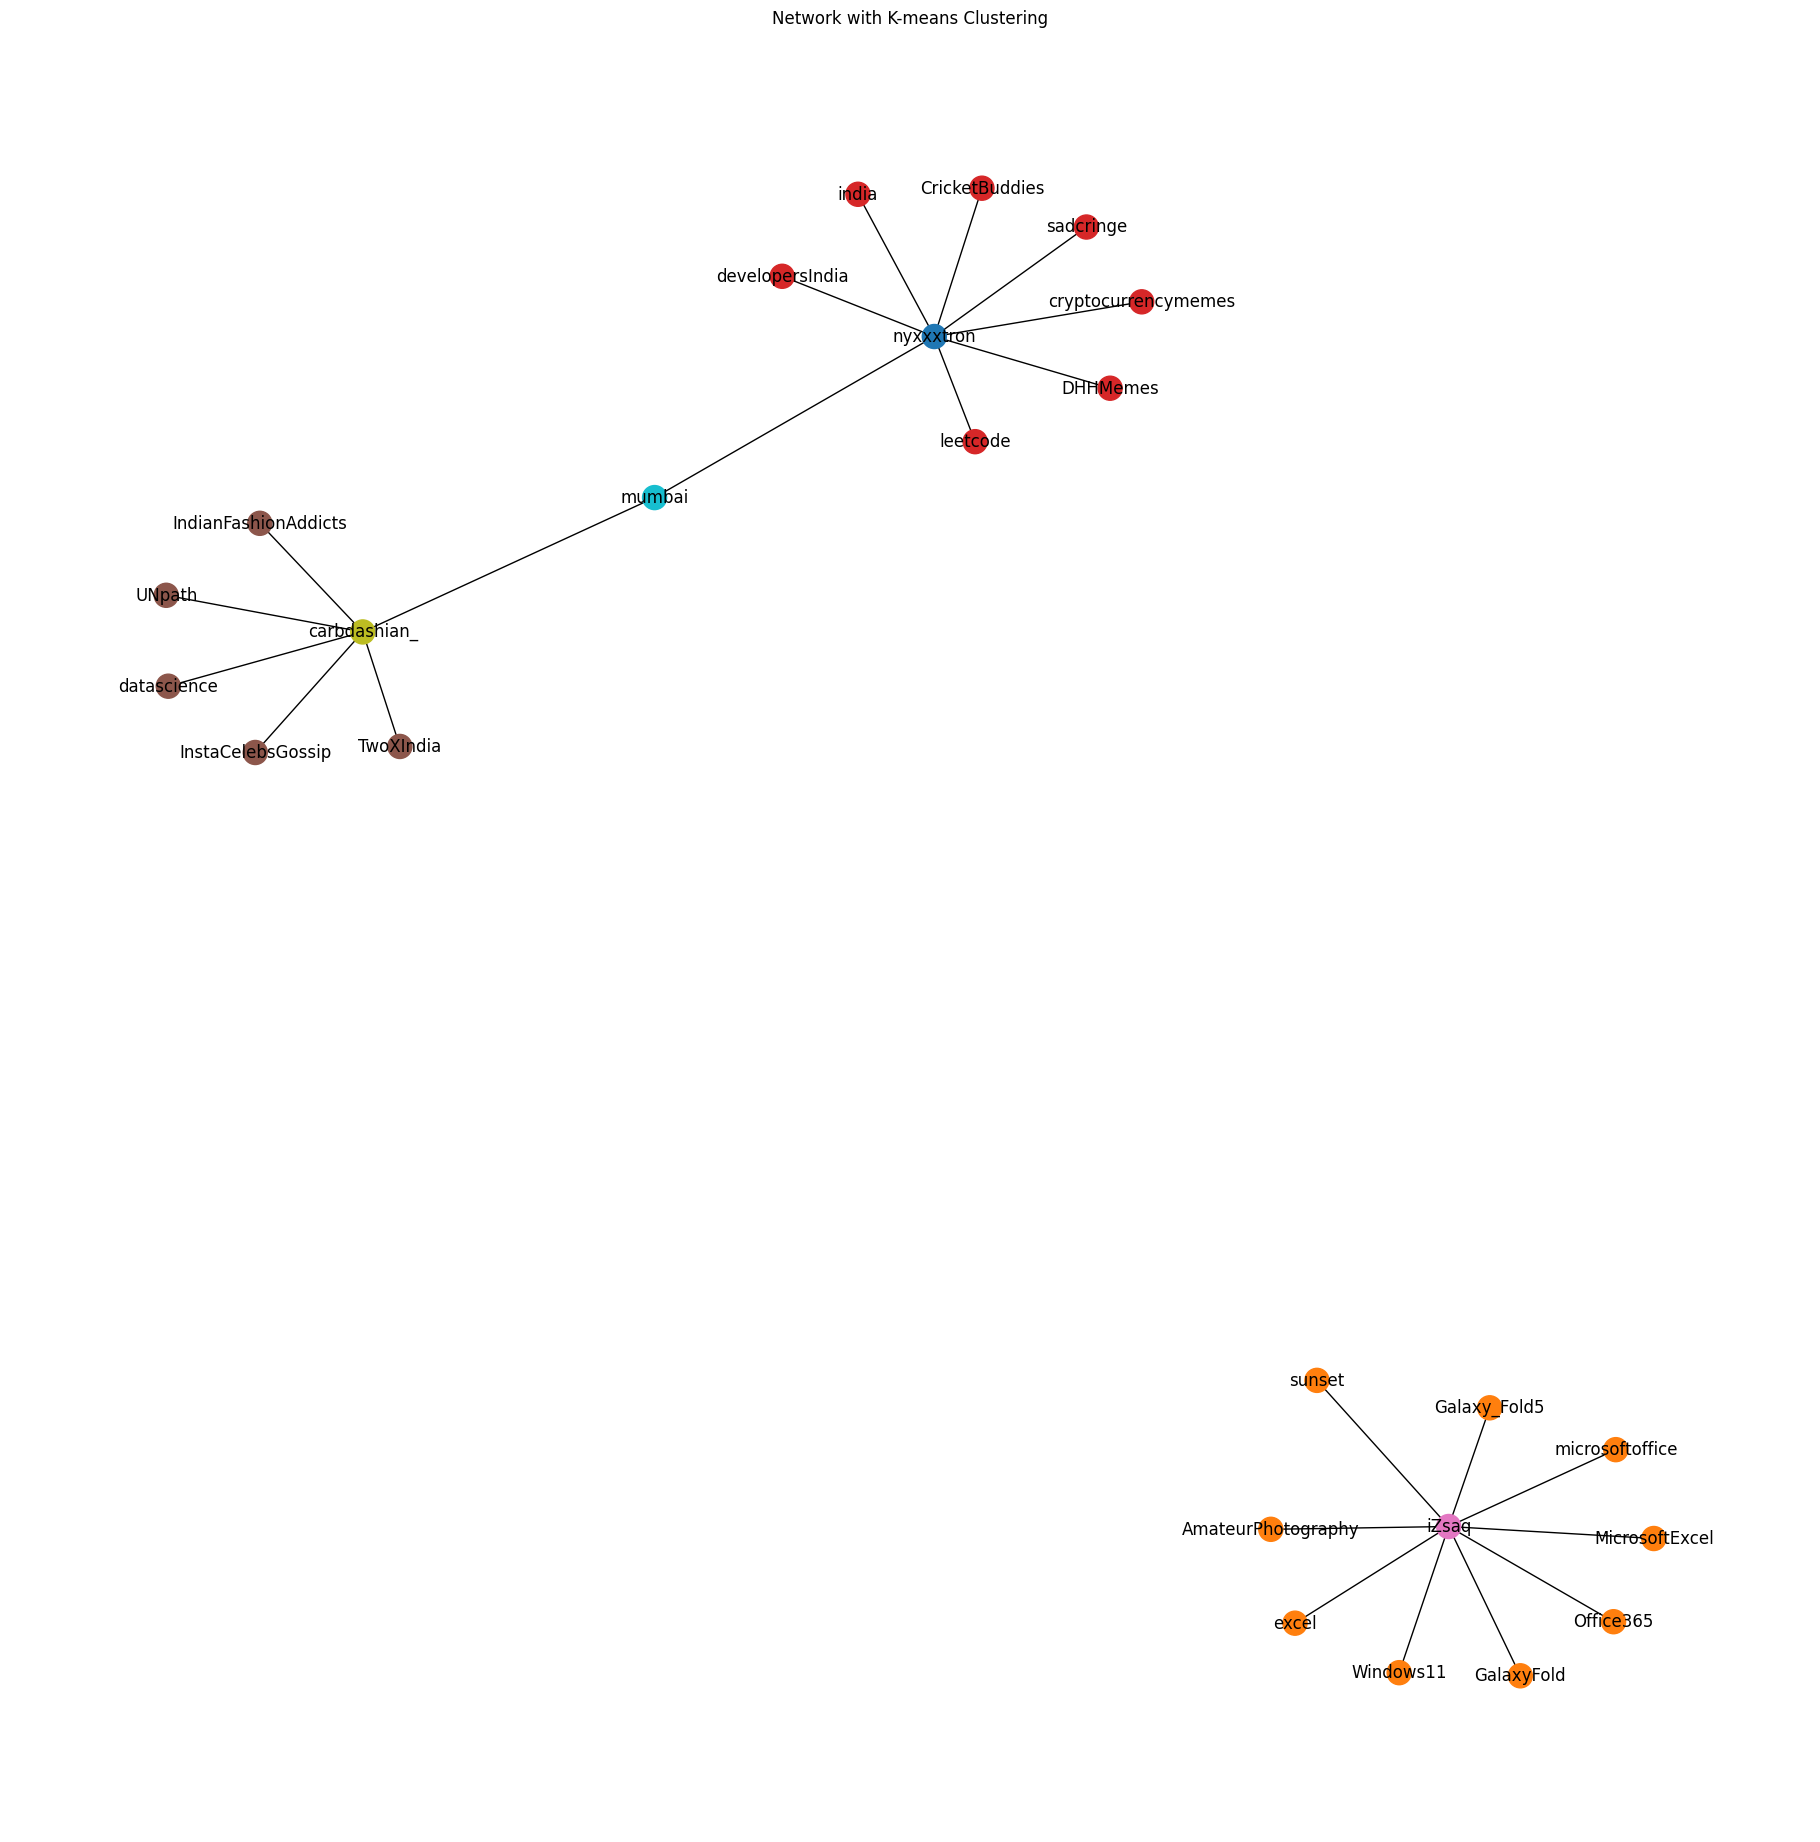

In [33]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load CSV data
reddit_data = pd.read_csv('user1_posts.csv')

# Construct a network where nodes are users and edges represent interactions (comments/posts)
G = nx.from_pandas_edgelist(reddit_data, source='author', target='subreddit')

# Compute adjacency matrix
adj_matrix = nx.to_numpy_array(G)

# Perform K-means clustering
k = 10  # Number of clusters
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(adj_matrix)

# Assign cluster labels to nodes
for node, cluster_label in zip(G.nodes(), clusters):
    G.nodes[node]['cluster'] = cluster_label

# Draw the network with nodes colored by cluster
plt.figure(figsize=(18, 18))  # Increase the figure size
pos = nx.spring_layout(G)  # Layout for visualization
node_colors = [clusters[i] for i in range(len(G.nodes()))]
nx.draw(G, pos, node_color=node_colors, with_labels=True, cmap=plt.cm.tab10)
plt.title('Network with K-means Clustering')
plt.show()
